In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = "ProtParamExpressedCopy.csv"
df = pd.read_csv(data)
# https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable
# Change the categorical labels into binary (numerical)
df['trial_status'] =df['trial_status'].astype('category').cat.codes
df

,trial_sequence,bio_isoelectric_point,bio_molecular_weight,bio_aromaticity,bio_instability,bio_gravy,prot_flexibility,sequence_length,helix_fraction,turn_fraction,...,polar_aa_percent,hydrophobic_aa_percent,frac_aliphatic,frac_uncharged_polar,frac_positive,frac_sulfur,frac_negative,frac_amide,frac_alcohol,trial_status
0,MSSSPVKRQRMESALDQLKQFTTVVADTGDFHAIDEYKPQDATTNP...,6.355986,37539.6793,0.077151,34.957567,-0.250445,1.003072,337,0.296736,0.181009,...,0.270030,0.456973,0.415430,0.181009,0.151335,0.035608,0.139466,0.071217,0.109792,0
1,MAASLVGKKIVFVTGNAKKLEEVVQILGDKFPCTLVAQKIDLPEYQ...,5.503799,21445.4220,0.097938,32.807216,-0.170103,1.001438,194,0.309278,0.211340,...,0.257732,0.510309,0.453608,0.159794,0.118557,0.046392,0.123711,0.082474,0.077320,0
2,MPRYELALILKAMQRPETAATLKRTIEALMDRGAIVRDLENLGERA...,9.298098,14226.3961,0.056000,37.828080,-0.368800,0.998682,125,0.296000,0.168000,...,0.256000,0.456000,0.440000,0.144000,0.192000,0.040000,0.128000,0.056000,0.088000,0
3,MAVCGLGSRLGLGSRLGLRGCFGAARLLYPRFQSRGPQGVEDGDRP...,8.859777,27387.9391,0.080000,40.756800,-0.348000,1.003691,250,0.264000,0.240000,...,0.288000,0.468000,0.420000,0.204000,0.144000,0.040000,0.112000,0.060000,0.144000,0
4,MATELQCPDSMPCHNQQVNSASTPSPEQLRPGDLILDHAGGNRASR...,5.707169,33786.0793,0.061489,51.529126,-0.255016,1.002304,309,0.278317,0.268608,...,0.336570,0.449838,0.420712,0.229773,0.119741,0.051780,0.116505,0.080906,0.148867,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,ASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLGT...,6.228440,35395.7462,0.079114,40.417437,0.011709,0.993796,316,0.325949,0.199367,...,0.294304,0.465190,0.414557,0.158228,0.145570,0.075949,0.126582,0.053797,0.104430,1
2617,AAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENEE...,7.104613,25658.0213,0.069959,25.499588,-0.003704,1.000288,243,0.267490,0.246914,...,0.308642,0.502058,0.473251,0.205761,0.111111,0.045267,0.094650,0.057613,0.148148,1
2618,SCPNYCSGNSNSGSLRTSRHIPLTSIDLCPTSVSCGDVLYLPTSSQ...,8.027942,22423.0737,0.071770,65.528230,-0.231579,0.996169,209,0.239234,0.392344,...,0.511962,0.387560,0.358852,0.344498,0.081340,0.100478,0.043062,0.095694,0.248804,1
2619,SLCEDMLLCNYRKCRIKLSGYAWVTACSHIFCDQHGSGEFSRSPAI...,8.586947,31412.3874,0.097826,52.909783,-0.509783,1.004917,276,0.282609,0.253623,...,0.358696,0.394928,0.340580,0.246377,0.148551,0.050725,0.115942,0.097826,0.148551,1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = "ProtParamExpressedCopy.csv"
df = pd.read_csv(data)
# https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable
# Change the categorical labels into binary (numerical)


<AxesSubplot: >

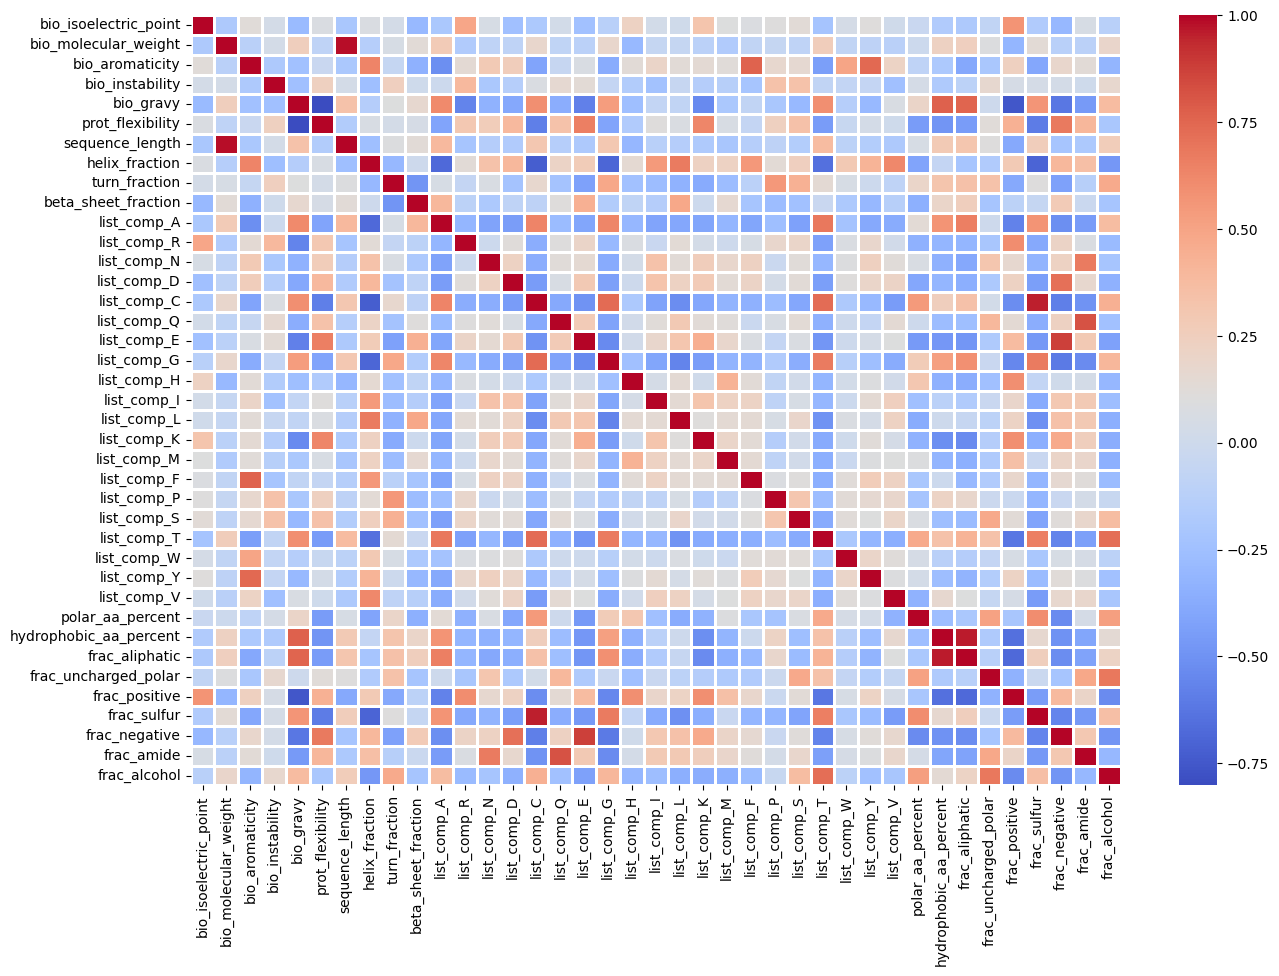

In [3]:

# Initialize figure
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

# Calculate correlations
correlations = df.drop(['trial_sequence', "trial_status"],axis=1).corr()

# Produce heatmap
sns.heatmap(correlations,cmap='coolwarm',ax=ax,linewidths=2)

C:\Users\kgqr995\AppData\Local\Temp\ipykernel_20456\1314762580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(df).corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

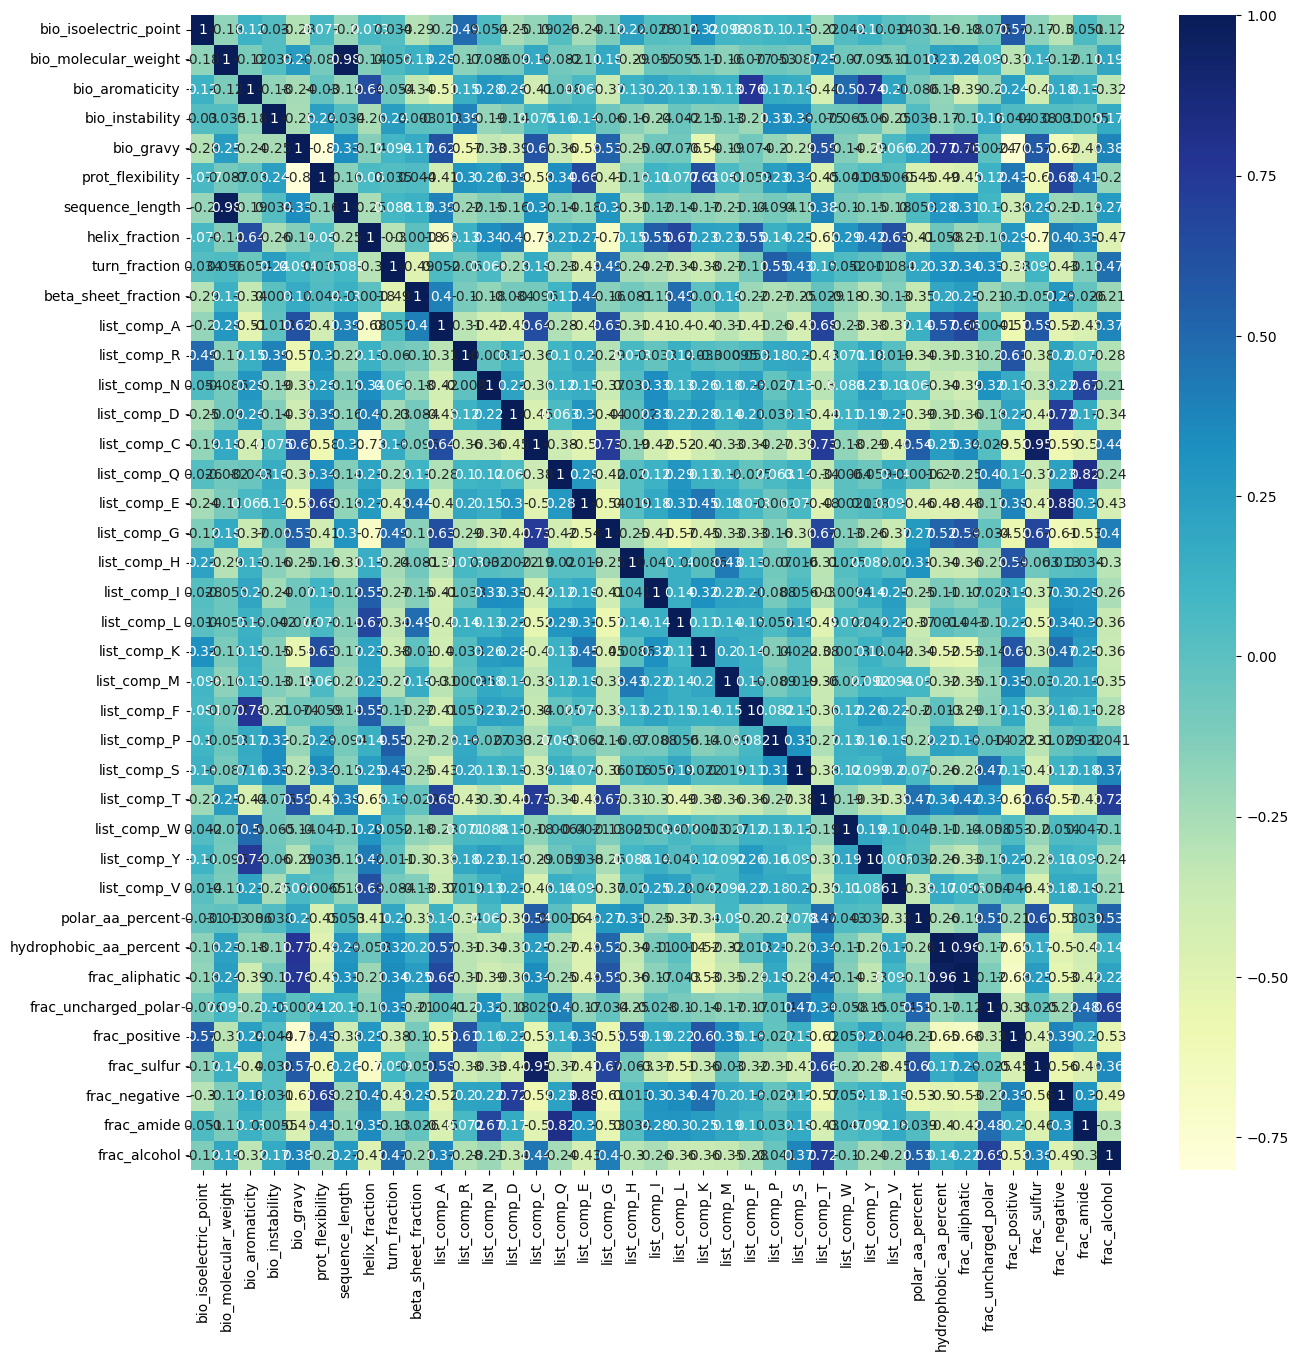

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pd.DataFrame(df).corr(), annot=True, cmap="YlGnBu")

In [5]:
# standardize the data
from sklearn.preprocessing import StandardScaler

features = []

# Separating out the features
x = df.drop(['trial_status', 'trial_sequence'],axis=1).values

# Separating out the target
y = df.loc[:,['trial_status']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

<AxesSubplot: >

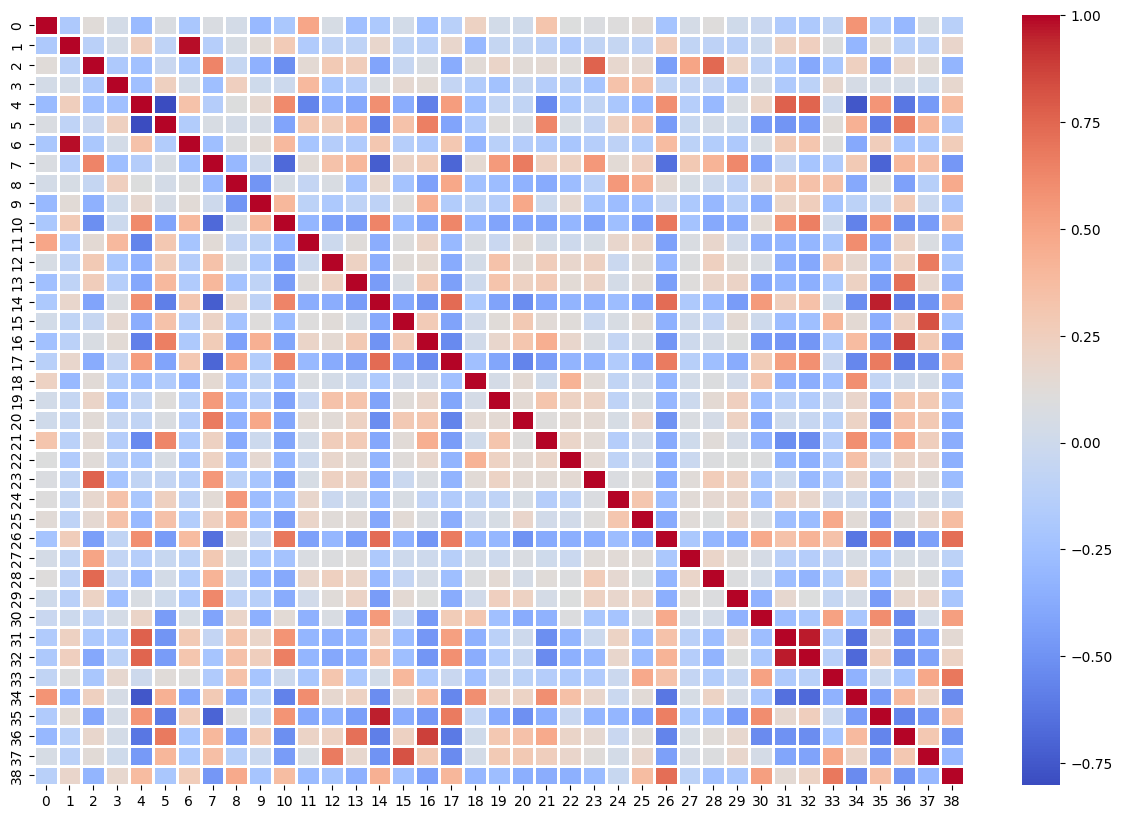

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

sns.heatmap(pd.DataFrame(x).corr(),cmap='coolwarm',ax=ax,linewidths=2)

In [7]:
for thing in correlations.columns:
    print("*********")
    print(f'{thing} correlates with:\n')
    for corr in correlations.index[correlations[thing].abs() > 0.6]:
        if correlations.loc[corr,thing] == 1.0:
            continue
        if thing == corr:
            continue

        print(corr, correlations.loc[corr,thing].round(3),sep='\t\t')
    print('\n')

*********
bio_isoelectric_point correlates with:



*********
bio_molecular_weight correlates with:

sequence_length		0.982


*********
bio_aromaticity correlates with:

helix_fraction		0.641
list_comp_F		0.763
list_comp_Y		0.742


*********
bio_instability correlates with:



*********
bio_gravy correlates with:

prot_flexibility		-0.802
list_comp_A		0.619
hydrophobic_aa_percent		0.772
frac_aliphatic		0.759
frac_positive		-0.759
frac_negative		-0.619


*********
prot_flexibility correlates with:

bio_gravy		-0.802
list_comp_E		0.659
list_comp_K		0.63
frac_negative		0.677


*********
sequence_length correlates with:

bio_molecular_weight		0.982


*********
helix_fraction correlates with:

bio_aromaticity		0.641
list_comp_A		-0.678
list_comp_C		-0.728
list_comp_G		-0.696
list_comp_L		0.673
list_comp_T		-0.652
list_comp_V		0.626
frac_sulfur		-0.699


*********
turn_fraction correlates with:



*********
beta_sheet_fraction correlates with:



*********
list_comp_A correlates with:

bio_g

In [8]:
df.corr(method ='pearson')

C:\Users\kgqr995\AppData\Local\Temp\ipykernel_20456\2355739806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,bio_isoelectric_point,bio_molecular_weight,bio_aromaticity,bio_instability,bio_gravy,prot_flexibility,sequence_length,helix_fraction,turn_fraction,beta_sheet_fraction,...,list_comp_V,polar_aa_percent,hydrophobic_aa_percent,frac_aliphatic,frac_uncharged_polar,frac_positive,frac_sulfur,frac_negative,frac_amide,frac_alcohol
bio_isoelectric_point,1.000000,-0.176276,0.120430,0.030436,-0.281916,0.076772,-0.196474,0.073265,0.033681,-0.291805,...,0.013653,-0.031082,-0.164091,-0.179772,-0.075591,0.573215,-0.165168,-0.298200,0.050820,-0.124364
bio_molecular_weight,-0.176276,1.000000,-0.117604,0.034535,0.252193,-0.087416,0.982117,-0.135252,0.056434,0.128840,...,-0.113411,-0.012899,0.228838,0.240271,0.090595,-0.311256,0.139354,-0.121940,-0.111080,0.190568
bio_aromaticity,0.120430,-0.117604,1.000000,-0.178033,-0.242315,-0.029574,-0.194529,0.640545,-0.053790,-0.343835,...,0.213871,-0.086261,-0.183360,-0.390357,-0.197269,0.237663,-0.398194,0.178646,0.129843,-0.322251
bio_instability,0.030436,0.034535,-0.178033,1.000000,-0.248493,0.236678,0.033770,-0.256944,0.240079,0.003029,...,-0.246477,0.038016,-0.170693,-0.102823,0.162518,0.044064,0.037531,0.030764,0.005499,0.172415
bio_gravy,-0.281916,0.252193,-0.242315,-0.248493,1.000000,-0.801743,0.334104,-0.143006,0.094234,0.168693,...,0.065596,0.200460,0.772229,0.758742,-0.002403,-0.758903,0.568143,-0.619155,-0.460122,0.378137
prot_flexibility,0.076772,-0.087416,-0.029574,0.236678,-0.801743,1.000000,-0.159650,0.060315,0.035183,0.044122,...,0.006548,-0.451512,-0.488513,-0.450138,0.124100,0.433753,-0.599596,0.677087,0.405513,-0.200432
sequence_length,-0.196474,0.982117,-0.194529,0.033770,0.334104,-0.159650,1.000000,-0.253703,0.087993,0.128378,...,-0.175779,0.052611,0.283444,0.310337,0.100337,-0.383957,0.255720,-0.214011,-0.188709,0.265414
helix_fraction,0.073265,-0.135252,0.640545,-0.256944,-0.143006,0.060315,-0.253703,1.000000,-0.301078,-0.001816,...,0.626147,-0.410389,-0.057720,-0.210845,-0.164848,0.285666,-0.698751,0.398028,0.352782,-0.471431
turn_fraction,0.033681,0.056434,-0.053790,0.240079,0.094234,0.035183,0.087993,-0.301078,1.000000,-0.488504,...,-0.084429,0.196233,0.321787,0.338803,0.331771,-0.382867,0.099289,-0.426484,-0.129902,0.468759
beta_sheet_fraction,-0.291805,0.128840,-0.343835,0.003029,0.168693,0.044122,0.128378,-0.001816,-0.488504,1.000000,...,-0.131820,-0.347846,0.196079,0.248038,-0.214873,-0.104530,-0.050658,0.277059,-0.026045,-0.212422
